In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset #

In [9]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data preparation and Exploration #

In [10]:
df.shape

(194673, 38)

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

#### Drop useless columns ####
- Drop attribute that obviously not useful
- or just a description of another numeric value
- or duplicated

In [14]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [11]:
df0=df[["ADDRTYPE","JUNCTIONTYPE","COLLISIONTYPE","SDOT_COLDESC","ST_COLDESC"]]
df0.head(10)

,ADDRTYPE,JUNCTIONTYPE,COLLISIONTYPE,SDOT_COLDESC,ST_COLDESC
0,Intersection,At Intersection (intersection related),Angles,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle
1,Block,Mid-Block (not related to intersection),Sideswipe,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",From same direction - both going straight - bo...
2,Block,Mid-Block (not related to intersection),Parked Car,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",One parked--one moving
3,Block,Mid-Block (not related to intersection),Other,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From same direction - all others
4,Intersection,At Intersection (intersection related),Angles,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle
5,Intersection,At Intersection (intersection related),Angles,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle
6,Intersection,At Intersection (intersection related),Angles,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle
7,Intersection,At Intersection (intersection related),Cycles,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Vehicle Strikes Pedalcyclist
8,Block,Mid-Block (not related to intersection),Parked Car,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",One parked--one moving
9,Intersection,At Intersection (intersection related),Angles,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle


ADDRTYPE and JUNCTIONTYPE are similar value--> Keep ADDRTYPE\
COLLISIONTYPE & ST_COLDESC--> keep ST_COLCODE

In [12]:
df=df.drop(['OBJECTID', 'REPORTNO','LOCATION','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
            'JUNCTIONTYPE','COLLISIONTYPE','SDOT_COLDESC','ST_COLDESC',],axis=1)

In [13]:
df.shape

(194673, 28)

### dealing with missing data ###
- drop the column that with too much lost information

In [10]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
INCKEY                 0
COLDETKEY              0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
EXCEPTRSNCODE     109862
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [14]:
df=df.drop(["INTKEY","EXCEPTRSNCODE","SDOTCOLNUM"],axis=1)

In [15]:
df.shape

(194673, 25)

- as we notice that, the feature "SPEEDING", "INATTENTIONIND", "PEDROWNOTGRNT", are only filled with value "Y" or "N" if the situation is confirmed. \
So it possible to fill it's value as dummy values. 

In [16]:
df["SPEEDING"]=df["SPEEDING"].fillna(0)
df["SPEEDING"]=df["SPEEDING"].replace(to_replace="Y",value=1)
df["SPEEDING"].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [17]:
df["INATTENTIONIND"]=df["INATTENTIONIND"].fillna(0)
df["INATTENTIONIND"]=df["INATTENTIONIND"].replace(to_replace="Y",value=1)
df["INATTENTIONIND"].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [18]:
df["PEDROWNOTGRNT"]=df["PEDROWNOTGRNT"].fillna(0)
df["PEDROWNOTGRNT"]=df["PEDROWNOTGRNT"].replace(to_replace="Y",value=1)
df["PEDROWNOTGRNT"].value_counts()

0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64

"UNDERINFL", "HITPARKEDCAR" value could also be categorized as 1 or 0

In [19]:
df["UNDERINFL"].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

Attribute filled with 4 kind value: "Y","N","0","1", replace "Y" with 1, replace "N" with 0

In [20]:
df["UNDERINFL"]=df["UNDERINFL"].replace(to_replace="N",value= 0)
df["UNDERINFL"]=df["UNDERINFL"].replace(to_replace="Y",value= 1)
df["UNDERINFL"]=pd.to_numeric(df["UNDERINFL"])
df["UNDERINFL"].value_counts()

0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64

In [21]:
df["HITPARKEDCAR"]=df["HITPARKEDCAR"].replace(to_replace="N",value=0)
df["HITPARKEDCAR"]=df["HITPARKEDCAR"].replace(to_replace="Y",value=1)
df["HITPARKEDCAR"].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

In [22]:
df["STATUS"]=df["STATUS"].replace(to_replace="Matched", value=1)
df["STATUS"]=df["STATUS"].replace(to_replace="Unmatched", value=0)
df["STATUS"].value_counts()

1    189786
0      4887
Name: STATUS, dtype: int64

In [17]:
df.isnull().sum()

SEVERITYCODE         0
X                 5334
Y                 5334
INCKEY               0
COLDETKEY            0
STATUS               0
ADDRTYPE          1926
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
SDOT_COLCODE         0
INATTENTIONIND       0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

- drop rows that have no complete information

In [23]:
df=df.dropna(axis=0, how="any")
print(df.shape)
df.head(5)

(184149, 25)


,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,STATUS,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,1307,1,Intersection,2,0,0,...,0.0,Overcast,Wet,Daylight,0,0,10,0,0,0
1,1,-122.347294,47.647172,52200,52200,1,Block,2,0,0,...,0.0,Raining,Wet,Dark - Street Lights On,0,0,11,0,0,0
2,1,-122.334540,47.607871,26700,26700,1,Block,4,0,0,...,0.0,Overcast,Dry,Daylight,0,0,32,0,0,0
3,1,-122.334803,47.604803,1144,1144,1,Block,3,0,0,...,0.0,Clear,Dry,Daylight,0,0,23,0,0,0
4,2,-122.306426,47.545739,17700,17700,1,Intersection,2,0,0,...,0.0,Raining,Wet,Daylight,0,0,10,0,0,0


In [22]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
INCKEY              int64
COLDETKEY           int64
STATUS              int64
ADDRTYPE           object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
SDOT_COLCODE        int64
INATTENTIONIND      int64
UNDERINFL         float64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT       int64
SPEEDING            int64
ST_COLCODE        float64
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
dtype: object

In [24]:
df["ST_COLCODE"]=pd.to_numeric(df["UNDERINFL"])

In [25]:
df.to_csv("prep_col_df.csv")

In [26]:
df=pd.read_csv("prep_col_df.csv")
df.head()

,Unnamed: 0,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,STATUS,ADDRTYPE,PERSONCOUNT,PEDCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,2,-122.323148,47.703140,1307,1307,1,Intersection,2,0,...,0.0,Overcast,Wet,Daylight,0,0,0.0,0,0,0
1,1,1,-122.347294,47.647172,52200,52200,1,Block,2,0,...,0.0,Raining,Wet,Dark - Street Lights On,0,0,0.0,0,0,0
2,2,1,-122.334540,47.607871,26700,26700,1,Block,4,0,...,0.0,Overcast,Dry,Daylight,0,0,0.0,0,0,0
3,3,1,-122.334803,47.604803,1144,1144,1,Block,3,0,...,0.0,Clear,Dry,Daylight,0,0,0.0,0,0,0
4,4,2,-122.306426,47.545739,17700,17700,1,Intersection,2,0,...,0.0,Raining,Wet,Daylight,0,0,0.0,0,0,0


# Data preperation & Feature Extraction #

#### first blick of correlation among numeric value ####

In [21]:
df.corr()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,1.000000,0.010238,0.018411,0.030490,0.030505,0.001540,0.127421,0.248455,0.216223,-0.085072,0.182801,0.043666,0.043044,0.208712,0.037349,0.043044,0.105011,0.176460,-0.101457
X,0.010238,1.000000,-0.160181,0.010394,0.010383,0.002001,0.012762,0.011406,-0.001871,-0.016047,0.011259,-0.015729,-0.031686,0.008432,-0.008368,-0.031686,-0.001816,0.014240,-0.016369
Y,0.018411,-0.160181,1.000000,-0.026684,-0.026699,0.001997,-0.014076,0.010419,0.026722,0.020597,-0.019644,0.008973,-0.007046,0.022223,-0.026972,-0.007046,0.004510,0.009656,-0.012255
INCKEY,0.030490,0.010394,-0.026684,1.000000,0.999996,0.003696,-0.052618,0.032068,0.037433,-0.016203,-0.020036,0.111585,0.001690,-0.013008,-0.034003,0.001690,0.021890,0.051604,0.259684
COLDETKEY,0.030505,0.010383,-0.026699,0.999996,1.000000,0.003687,-0.052520,0.032069,0.037392,-0.016191,-0.019904,0.111458,0.001714,-0.013017,-0.033965,0.001714,0.021773,0.051484,0.259755
STATUS,0.001540,0.002001,0.001997,0.003696,0.003687,1.000000,0.004233,0.000447,0.000404,-0.000110,0.000014,0.001010,0.000524,0.000375,0.000519,0.000524,0.000192,0.000321,0.000450
PERSONCOUNT,0.127421,0.012762,-0.014076,-0.052618,-0.052520,0.004233,1.000000,-0.026985,-0.042417,0.395190,-0.142455,0.071937,0.021682,-0.030600,-0.001659,0.021682,-0.022620,-0.034724,-0.052742
PEDCOUNT,0.248455,0.011406,0.010419,0.032068,0.032069,0.000447,-0.026985,1.000000,-0.018374,-0.321602,0.270297,-0.006499,0.015394,0.495672,-0.033375,0.015394,0.001465,0.571188,-0.035481
PEDCYLCOUNT,0.216223,-0.001871,0.026722,0.037433,0.037392,0.000404,-0.042417,-0.018374,1.000000,-0.310826,0.397360,0.001997,-0.017622,0.323493,-0.020685,-0.017622,0.456402,0.109617,-0.030285
VEHCOUNT,-0.085072,-0.016047,0.020597,-0.016203,-0.016191,-0.000110,0.395190,-0.321602,-0.310826,1.000000,-0.468309,0.047944,-0.007975,-0.280773,-0.040661,-0.007975,-0.147203,-0.241569,0.069231


numeric value: which have reletive higher correlation with "Severitycode"? (choose correlation > 0.1)
"PERSONCOUNT","PEDCOUND", "PEDCYLCOUNT","SDOT_COLCODE","PEDROWNOTGRNT","SEGLANEKEY","CROSSWALKKEY"

In [28]:
df_col=df[["SEVERITYCODE","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","SDOT_COLCODE","PEDROWNOTGRNT","SEGLANEKEY","CROSSWALKKEY"]]
df_col.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,PEDROWNOTGRNT,SEGLANEKEY,CROSSWALKKEY
0,2,2,0,0,11,0,0,0
1,1,2,0,0,16,0,0,0
2,1,4,0,0,14,0,0,0
3,1,3,0,0,11,0,0,0
4,2,2,0,0,11,0,0,0


#### In consideration of objective value ####


In [29]:
df1=df[["SEVERITYCODE","X","Y","ADDRTYPE", "WEATHER",
           "ROADCOND","LIGHTCOND","INCDATE","INCDTTM"]]
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDATE,INCDTTM
0,2,-122.323148,47.703140,Intersection,Overcast,Wet,Daylight,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM
1,1,-122.347294,47.647172,Block,Raining,Wet,Dark - Street Lights On,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM
2,1,-122.334540,47.607871,Block,Overcast,Dry,Daylight,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM
3,1,-122.334803,47.604803,Block,Clear,Dry,Daylight,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM
4,2,-122.306426,47.545739,Intersection,Raining,Wet,Daylight,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM


- Data Formatting with object datatype

In [16]:
import datetime

In [30]:
df1['INCDATE'] = pd.to_datetime(df1['INCDATE'])
df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDATE,INCDTTM
0,2,-122.323148,47.703140,Intersection,Overcast,Wet,Daylight,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00
1,1,-122.347294,47.647172,Block,Raining,Wet,Dark - Street Lights On,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00
2,1,-122.334540,47.607871,Block,Overcast,Dry,Daylight,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00
3,1,-122.334803,47.604803,Block,Clear,Dry,Daylight,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00
4,2,-122.306426,47.545739,Intersection,Raining,Wet,Daylight,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00


In [31]:
df1["DayofWeek"]=df1["INCDATE"].dt.dayofweek
df1["hour"]=df1["INCDTTM"].dt.hour

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df1.head(10)

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDATE,INCDTTM,DayofWeek,hour
0,2,-122.323148,47.703140,Intersection,Overcast,Wet,Daylight,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,2,14
1,1,-122.347294,47.647172,Block,Raining,Wet,Dark - Street Lights On,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,2,18
2,1,-122.334540,47.607871,Block,Overcast,Dry,Daylight,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,3,10
3,1,-122.334803,47.604803,Block,Clear,Dry,Daylight,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,4,9
4,2,-122.306426,47.545739,Intersection,Raining,Wet,Daylight,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,2,8
5,1,-122.387598,47.690575,Intersection,Clear,Dry,Daylight,2019-04-20 00:00:00+00:00,2019-04-20 17:42:00,5,17
6,1,-122.338485,47.618534,Intersection,Raining,Wet,Daylight,2008-12-09 00:00:00+00:00,2008-12-09 00:00:00,1,0
7,2,-122.320780,47.614076,Intersection,Clear,Dry,Daylight,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,2,17
8,1,-122.335930,47.611904,Block,Clear,Dry,Daylight,2006-06-15 00:00:00+00:00,2006-06-15 13:00:00,3,13
9,2,-122.384700,47.528475,Intersection,Clear,Dry,Daylight,2006-03-20 00:00:00+00:00,2006-03-20 15:49:00,0,15


<AxesSubplot:xlabel='DayofWeek'>

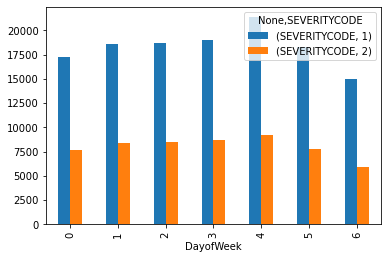

In [32]:
day_of_week = pd.DataFrame(df1.groupby(["DayofWeek"])["SEVERITYCODE"].value_counts())
day_of_week.unstack().plot(kind="bar")

In [30]:
hour=pd.DataFrame(df1.groupby(["hour"])["SEVERITYCODE"].value_counts())
hour

SEVERITYCODE
hour SEVERITYCODE              
0    1                    20564
     2                     8020
1    1                     2479
     2                      816
2    1                     2621
     2                      837
3    1                     1263
     2                      331
4    1                      913
     2                      265
5    1                     1116
     2                      468
6    1                     2089
     2                      995
7    1                     4245
     2                     2106
8    1                     5654
     2                     2618
9    1                     5437
     2                     2361
10   1                     5128
     2                     2095
11   1                     5631
     2                     2346
12   1                     7126
     2                     2938
13   1                     6939
     2                     3041
14   1                     7054
     2                     3316
15   1                     7522
     2                     3688
16   1                     7869
     2                     3944
17   1                     8171
     2                     4426
18   1                     6203
     2                     3265
19   1                     4816
     2                     2245
20   1                     4317
     2                     1724
21   1                     3828
     2                     1588
22   1                     3808
     2                     1490
23   1                     3356
     2                     1077

<AxesSubplot:xlabel='hour'>

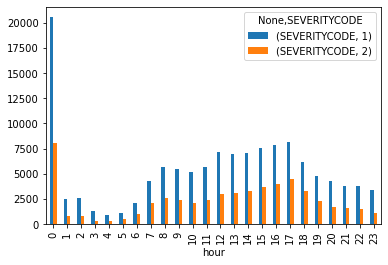

In [29]:
hour.unstack().plot(kind="bar")

It's abnormal that the collision happens at midnight has a number that extremely high. After comparing with initial dataset, we could find that some of the value of "INCDTTM" does not include hour information--> so we should exclude the influence of it. \
Beside that, we could find a time related trend of collision cases

In [33]:
import pandas as pd
df_time = pd.DataFrame(df.INCDTTM.str.split(' ',5).tolist(),
                                 columns = ["day","time","PM/AM"])
df_time.head()

,day,time,PM/AM
0,3/27/2013,2:54:00,PM
1,12/20/2006,6:55:00,PM
2,11/18/2004,10:20:00,AM
3,3/29/2013,9:26:00,AM
4,1/28/2004,8:04:00,AM


In [38]:
df_time.isnull().sum()

day          0
time     24875
PM/AM    24875
dtype: int64

In [34]:
df1=pd.concat([df1,df_time],axis=1)
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDATE,INCDTTM,DayofWeek,hour,day,time,PM/AM
0,2,-122.323148,47.703140,Intersection,Overcast,Wet,Daylight,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,2,14,3/27/2013,2:54:00,PM
1,1,-122.347294,47.647172,Block,Raining,Wet,Dark - Street Lights On,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,2,18,12/20/2006,6:55:00,PM
2,1,-122.334540,47.607871,Block,Overcast,Dry,Daylight,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,3,10,11/18/2004,10:20:00,AM
3,1,-122.334803,47.604803,Block,Clear,Dry,Daylight,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,4,9,3/29/2013,9:26:00,AM
4,2,-122.306426,47.545739,Intersection,Raining,Wet,Daylight,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,2,8,1/28/2004,8:04:00,AM


In [35]:
df1.corr()

,SEVERITYCODE,X,Y,DayofWeek,hour
SEVERITYCODE,1.000000,0.010238,0.018411,-0.017101,0.027431
X,0.010238,1.000000,-0.160181,-0.008643,0.009141
Y,0.018411,-0.160181,1.000000,-0.005943,0.019126
DayofWeek,-0.017101,-0.008643,-0.005943,1.000000,-0.025875
hour,0.027431,0.009141,0.019126,-0.025875,1.000000


Both DayofWeek and hour have no significant correlation with SEVERITY of collision

In [28]:
add_type = pd.DataFrame(df1.groupby(["ADDRTYPE"])["SEVERITYCODE"].value_counts())
add_type.rename(columns={"SEVERITYCODE":"COUNT"})
add_type

SEVERITYCODE
ADDRTYPE     SEVERITYCODE              
Block        1                    92282
             2                    28737
Intersection 1                    35867
             2                    27263

<AxesSubplot:xlabel='ADDRTYPE'>

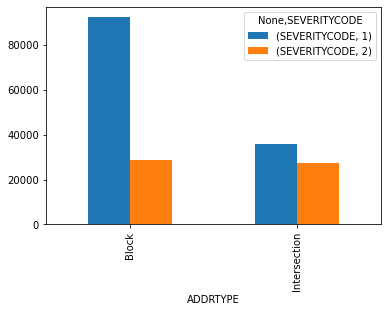

In [29]:
add_type.unstack().plot(kind="bar")

In [31]:
df1["WEATHER"].value_counts()

Clear                       108828
Raining                      31980
Overcast                     27099
Unknown                      13846
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

<AxesSubplot:xlabel='WEATHER'>

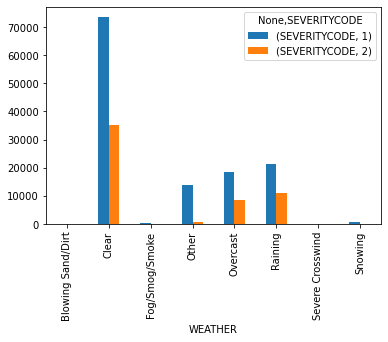

In [36]:
df1["WEATHER"]=df1["WEATHER"].replace(["Unknown"],"Other")
df1["WEATHER"]=df1["WEATHER"].replace(["Sleet/Hail/Freezing Rain"],"Raining")
df1["WEATHER"]=df1["WEATHER"].replace(["Partly Cloudy"],"Overcast")
df_w=pd.DataFrame(df1.groupby(["WEATHER"])["SEVERITYCODE"].value_counts())
df_w.unstack().plot(kind="bar")

All kinds of weather got more type 1 severity of collision than 2.

In [37]:
df1["ROADCOND"].value_counts()

Dry               121866
Wet                45999
Unknown            13793
Ice                 1173
Snow/Slush           984
Other                116
Standing Water       102
Sand/Mud/Dirt         63
Oil                   53
Name: ROADCOND, dtype: int64

<AxesSubplot:xlabel='ROADCOND'>

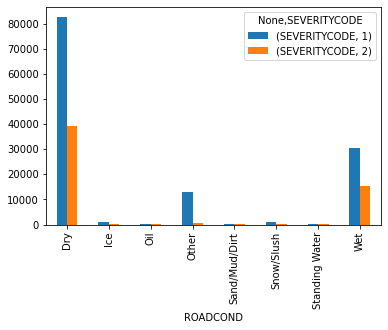

In [37]:
df1["ROADCOND"]=df1["ROADCOND"].replace(["Unknown"],"Other")
df_R=pd.DataFrame(df1.groupby(["ROADCOND"])["SEVERITYCODE"].value_counts())
df_R.unstack().plot(kind="bar")

In [38]:
df1["LIGHTCOND"].value_counts()

Daylight                    113510
Dark - Street Lights On      47247
Unknown                      12416
Dusk                          5762
Dawn                          2421
Dark - No Street Lights       1449
Dark - Street Lights Off      1145
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

<AxesSubplot:xlabel='LIGHTCOND'>

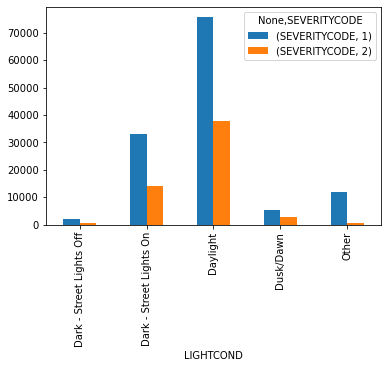

In [39]:
df1["LIGHTCOND"]=df1["LIGHTCOND"].replace(["Dark - No Street Lights"],"Dark - Street Lights Off")
df1["LIGHTCOND"]=df1["LIGHTCOND"].replace(["Dusk","Dawn"],"Dusk/Dawn")
df1["LIGHTCOND"]=df1["LIGHTCOND"].replace(["Dark - Unknown Lighting","Unknown"],"Other")
df_l=pd.DataFrame(df1.groupby(["LIGHTCOND"])["SEVERITYCODE"].value_counts())
df_l.unstack().plot(kind="bar")

In [40]:
df1.to_csv("df1.csv")

- #### Visualisation with folium since their are latitude and longitude information. ####

In [44]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [45]:
col_loc=df1[["X","Y","ADDRTYPE","SEVERITYCODE"]]
col_loc.head()

,X,Y,ADDRTYPE,SEVERITYCODE
0,-122.323148,47.703140,Intersection,2
1,-122.347294,47.647172,Block,1
2,-122.334540,47.607871,Block,1
3,-122.334803,47.604803,Block,1
4,-122.306426,47.545739,Intersection,2


In [46]:
col_map=folium.Map(location=[47.60480289, -122.3348033],zoom_start=12)

As we know, there is totally 194673 cases, in order to save the computational cost,  let's just work with the first 200 objects in this dataset.

In [47]:
limit=200
col_loc1=col_loc.iloc[0:limit,:]

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(col_loc1.Y, col_loc1.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

col_map = col_map.add_child(incidents)
col_map

In [48]:
from folium import plugins

In [49]:
col_map=folium.Map(location=[47.60480289, -122.3348033],zoom_start=12)
incidents = plugins.MarkerCluster().add_to(col_map)

In [50]:
for lat, lng, label, in zip(col_loc1.Y, col_loc1.X, col_loc1.ADDRTYPE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

col_map

To some extend, the accidents are more likely to take place in city center area. 
Along the main road (red line in the map), there is higher frequency of collision. 

In [79]:
df_col= df[["PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT",
           "SDOT_COLCODE","PEDROWNOTGRNT","SEGLANEKEY","CROSSWALKKEY"]]

In [41]:
df_col=pd.concat([df_col,df1["ADDRTYPE"]],axis=1)
df_col.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,PEDROWNOTGRNT,SEGLANEKEY,CROSSWALKKEY,ADDRTYPE
0,2,2,0,0,11,0,0,0,Intersection
1,1,2,0,0,16,0,0,0,Block
2,1,4,0,0,14,0,0,0,Block
3,1,3,0,0,11,0,0,0,Block
4,2,2,0,0,11,0,0,0,Intersection


In [42]:
df_col.isnull().sum()

SEVERITYCODE     0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
SDOT_COLCODE     0
PEDROWNOTGRNT    0
SEGLANEKEY       0
CROSSWALKKEY     0
ADDRTYPE         0
dtype: int64

In [43]:
df_col.to_csv("df_col.csv")

In [44]:
df_col=pd.read_csv("df_col.csv")
df_col.head()

,Unnamed: 0,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,PEDROWNOTGRNT,SEGLANEKEY,CROSSWALKKEY,ADDRTYPE
0,0,2,2,0,0,11,0,0,0,Intersection
1,1,1,2,0,0,16,0,0,0,Block
2,2,1,4,0,0,14,0,0,0,Block
3,3,1,3,0,0,11,0,0,0,Block
4,4,2,2,0,0,11,0,0,0,Intersection


# Modelling with Classification method #

In [46]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [47]:
df_col.head()

,Unnamed: 0,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,PEDROWNOTGRNT,SEGLANEKEY,CROSSWALKKEY,ADDRTYPE
0,0,2,2,0,0,11,0,0,0,Intersection
1,1,1,2,0,0,16,0,0,0,Block
2,2,1,4,0,0,14,0,0,0,Block
3,3,1,3,0,0,11,0,0,0,Block
4,4,2,2,0,0,11,0,0,0,Intersection


In [48]:
Feature=df_col[["PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","SDOT_COLCODE","PEDROWNOTGRNT",
                "SEGLANEKEY","CROSSWALKKEY","ADDRTYPE"]]

In [49]:
df_addt =pd.get_dummies(Feature["ADDRTYPE"])
df_addt.head()

,Block,Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [50]:
Feature=pd.concat([Feature,df_addt],axis=1)
Feature=Feature.drop(["ADDRTYPE"],axis=1)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,PEDROWNOTGRNT,SEGLANEKEY,CROSSWALKKEY,Block,Intersection
0,2,0,0,11,0,0,0,0,1
1,2,0,0,16,0,0,0,1,0
2,4,0,0,14,0,0,0,1,0
3,3,0,0,11,0,0,0,1,0
4,2,0,0,11,0,0,0,0,1


In [51]:
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
X [0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


array([[-0.34451586, -0.19178566, -0.17346616, -0.45371376, -0.16077402,
        -0.08241143, -0.1379062 , -1.38455077,  1.38455077],
       [-0.34451586, -0.19178566, -0.17346616,  0.29223677, -0.16077402,
        -0.08241143, -0.1379062 ,  0.72225593, -0.72225593],
       [ 1.12753043, -0.19178566, -0.17346616, -0.00614344, -0.16077402,
        -0.08241143, -0.1379062 ,  0.72225593, -0.72225593],
       [ 0.39150729, -0.19178566, -0.17346616, -0.45371376, -0.16077402,
        -0.08241143, -0.1379062 ,  0.72225593, -0.72225593],
       [-0.34451586, -0.19178566, -0.17346616, -0.45371376, -0.16077402,
        -0.08241143, -0.1379062 , -1.38455077,  1.38455077]])

In [60]:
y=df_col["SEVERITYCODE"].values
y[0:10]

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 2])

### Train/ Test dataset split ###

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147319, 9) (147319,)
Test set: (36830, 9) (36830,)


### Logistic Regression ###

In [54]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [55]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 1])

- select the best k 

In [56]:
# Best k
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.64412164, 0.6572088 , 0.65120825, 0.73983166, 0.74083627,
       0.74306272, 0.74235677, 0.74227532, 0.74330709])

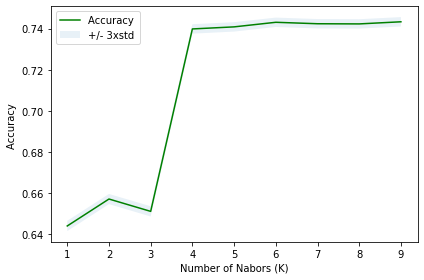

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

as k>3, the accuracy improve up to around 0.74 and relative stable--> here: select k=4

In [59]:
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 1])

- Model evaluation

In [62]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [65]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.74
KNN F1-score: 0.72
